In [2]:
from datetime import datetime
import math
import time
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataframe = pd.read_csv('bank_marketing_weka_dataset.csv', sep = ',')

## Sprawdzenie braków danych 

In [5]:
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79.0,1,-1.0,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220.0,1,339.0,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185.0,1,330.0,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199.0,4,-1.0,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226.0,1,-1.0,0,unknown,no


age,integer,Age of client: numerical value

job,string,"Type of job: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, 
technician, unemployed, unknown"

marital,string,"Marital status: divorced, married, single, unknown"

education,string,"Level of education: primary, secondary, tertiary, unknown"

default,string,"Has credit in default: no, yes, unknown"

balance,integer,Average yearly balance in Euro: numerical value

housing,string,"Has housing loan: no, yes, unknown"

loan,string,"Has personal loan: no, yes, unknown"

contact,string,"Communication type: unknown, telephone, cellular"

day,integer,Day of the month: numerical value between 1 and 31

month,string,"Month of the year: jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec"

duration,float,Last contact duration: numerical value in seconds

campaign,integer,Number of contacts made: numerical value

pdays,float,"Number of days passed since client was last contacted from a previous campaign: numerical value, -1 indicates 
client was not previously contacted"

previous,integer,Number of contacts performed before this campaign and for this client: numerical value

poutcome,string,"Outcome of previous marketing campaign: unknown, other, failure, success"

y,string,"Predictor class: yes, no"

In [6]:
dataframe.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [7]:
dataframe.isin(['unknown']).any()

age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
y            False
dtype: bool

## Zmiana daty na reprezentacje kątem  

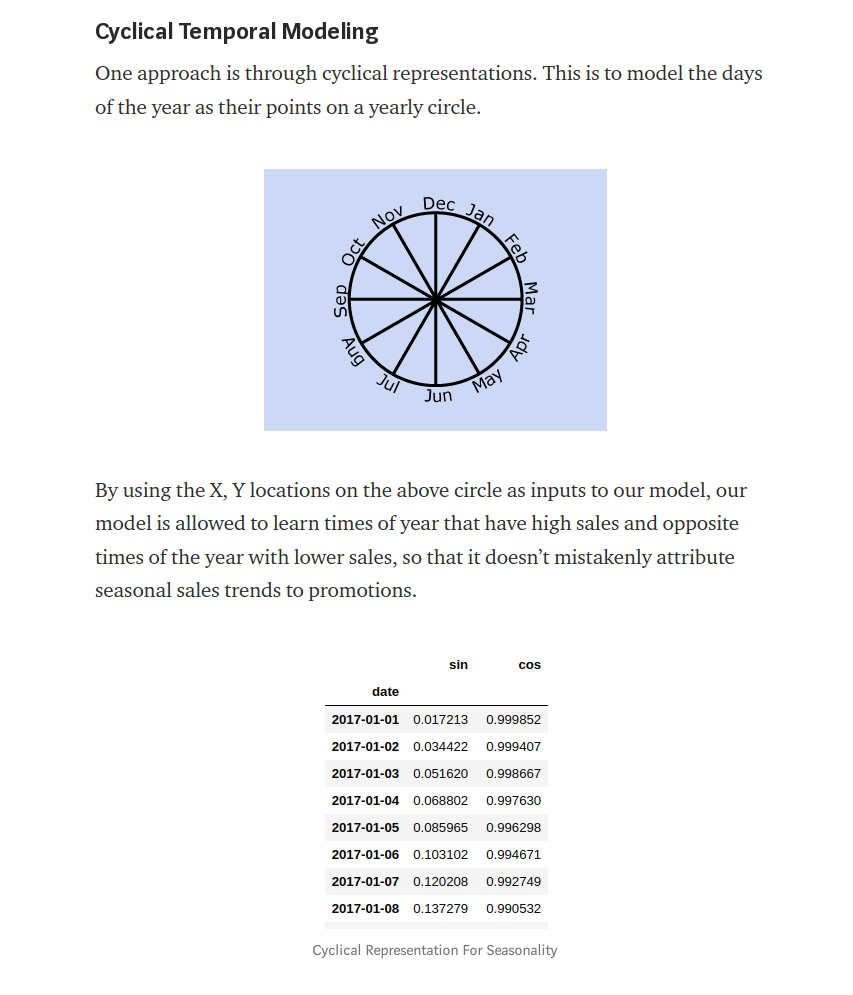

In [8]:
date = list(dataframe.day)
date = [str(item) for item in date]
date = [date[i] + '/' + list(dataframe.month)[i] for i in range(len(dataframe.day))] 

date = [int(datetime.strptime(item, '%d/%b').strftime('%j')) for item in date]
date_sin = [math.sin(date[i]/360) for i in range (len(date))]
date_cos = [math.cos(date[i]/360) for i in range (len(date))]
dataframe['date_sin'] = date_sin
dataframe['date_cos'] = date_cos

to_drop = ['month', 'day']
dataframe = dataframe.drop(to_drop, axis=1)

dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,date_sin,date_cos
0,30,unemployed,married,primary,no,1787,no,no,cellular,79.0,1,-1.0,0,unknown,no,0.725053,0.688693
1,33,services,married,secondary,no,4789,yes,yes,cellular,220.0,1,339.0,4,failure,no,0.355911,0.934520
2,35,management,single,tertiary,no,1350,yes,no,cellular,185.0,1,330.0,1,failure,no,0.290208,0.956964
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199.0,4,-1.0,0,unknown,no,0.414850,0.909890
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226.0,1,-1.0,0,unknown,no,0.340287,0.940322


## Kodowanie zmiennych kategorycznych 

In [9]:
dataframe[["marital","education","default","housing","loan","contact","poutcome", "y"]] = dataframe[["marital","education","default","housing","loan","contact","poutcome", "y"]].apply(LabelEncoder().fit_transform)
a = ce.BaseNEncoder(base=2).fit_transform(dataframe["job"])
dataframe = pd.concat([dataframe, a], axis=1).drop(["job"], axis=1)
dataframe.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,...,previous,poutcome,y,date_sin,date_cos,job_0,job_1,job_2,job_3,job_4
0,30,1,0,0,1787,0,0,0,79.0,1,...,0,3,0,0.725053,0.688693,0,0,0,0,1
1,33,1,1,0,4789,1,1,0,220.0,1,...,4,0,0,0.355911,0.934520,0,0,0,1,0
2,35,2,2,0,1350,1,0,0,185.0,1,...,1,0,0,0.290208,0.956964,0,0,0,1,1
3,30,1,2,0,1476,1,1,2,199.0,4,...,0,3,0,0.414850,0.909890,0,0,0,1,1
4,59,1,1,0,0,1,0,2,226.0,1,...,0,3,0,0.340287,0.940322,0,0,1,0,0


## Outliers

In [10]:
dataframe_orgin = pd.read_csv('bank_marketing_weka_dataset.csv')
upper_lim_balance = dataframe_orgin['balance'].mean() + dataframe_orgin['balance'].std() * 3
lower_lim_balance = dataframe_orgin['balance'].mean() - dataframe_orgin['balance'].std() * 3

dataframe.loc[(dataframe['balance'] > upper_lim_balance),'balance'] = upper_lim_balance
dataframe.loc[(dataframe['balance'] < lower_lim_balance),'balance'] = lower_lim_balance

upper_lim_pdays = dataframe_orgin.loc[dataframe_orgin.pdays > -1, 'pdays'].mean() + dataframe_orgin.loc[dataframe_orgin.pdays > -1, 'pdays'].std() * 3

dataframe.loc[(dataframe['pdays'] > upper_lim_pdays),'pdays'] = upper_lim_pdays

upper_lim_duration = dataframe_orgin['duration'].mean() + dataframe_orgin['duration'].std() * 3

dataframe.loc[(dataframe['duration'] > upper_lim_pdays),'duration'] = upper_lim_duration

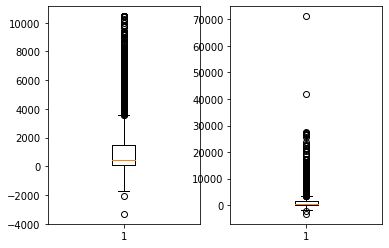

In [11]:
ig, axs = plt.subplots(1,2)

axs[0].boxplot(dataframe.balance)
axs[1].boxplot(dataframe_orgin.balance)

plt.show()

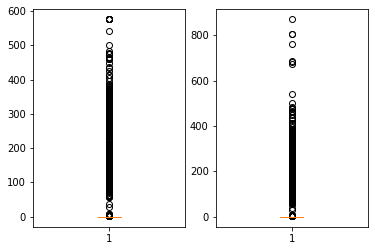

In [12]:
fig, axs = plt.subplots(1,2)

axs[0].boxplot(dataframe.pdays)
axs[1].boxplot(dataframe_orgin.pdays)

plt.show()

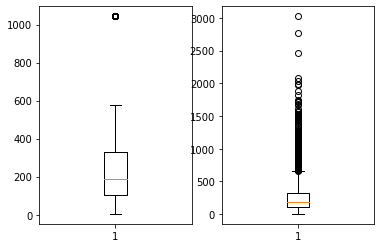

In [13]:
fig, axs = plt.subplots(1,2)

axs[0].boxplot(dataframe.duration)
axs[1].boxplot(dataframe_orgin.duration)

plt.show()

In [14]:
dataframe

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,...,previous,poutcome,y,date_sin,date_cos,job_0,job_1,job_2,job_3,job_4
0,30,1,0,0,1787.0,0,0,0,79.0,1,...,0,3,0,0.725053,0.688693,0,0,0,0,1
1,33,1,1,0,4789.0,1,1,0,220.0,1,...,4,0,0,0.355911,0.934520,0,0,0,1,0
2,35,2,2,0,1350.0,1,0,0,185.0,1,...,1,0,0,0.290208,0.956964,0,0,0,1,1
3,30,1,2,0,1476.0,1,1,2,199.0,4,...,0,3,0,0.414850,0.909890,0,0,0,1,1
4,59,1,1,0,0.0,1,0,2,226.0,1,...,0,3,0,0.340287,0.940322,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,1,1,0,-333.0,1,0,0,329.0,5,...,0,3,0,0.553125,0.833098,0,0,0,1,0
4517,57,1,2,1,-3313.0,1,1,2,153.0,1,...,0,3,0,0.350714,0.936483,0,0,1,0,1
4518,57,1,1,0,295.0,0,0,0,151.0,11,...,0,3,0,0.598531,0.801099,0,0,1,1,0
4519,28,1,1,0,1137.0,0,0,0,129.0,4,...,3,1,0,0.102597,0.994723,0,0,1,0,0


In [15]:
dataframe.columns

Index(['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y',
       'date_sin', 'date_cos', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4'],
      dtype='object')

In [16]:
dataframe.var()

age          1.118562e+02
marital      3.595796e-01
education    5.606178e-01
default      1.653151e-02
balance      4.725174e+06
housing      2.456950e-01
loan         1.295102e-01
contact      8.126989e-01
duration     8.060100e+04
campaign     9.670897e+00
pdays        9.669307e+03
previous     2.868153e+00
poutcome     9.841643e-01
y            1.019823e-01
date_sin     3.070811e-02
date_cos     1.015386e-02
job_0        0.000000e+00
job_1        1.649832e-01
job_2        2.488414e-01
job_3        2.420880e-01
job_4        2.378946e-01
dtype: float64

In [17]:
y = dataframe['y']
X = dataframe.drop('y', axis = 1)

In [18]:
print(y.sum(), y.shape)

521 (4521,)


## KM3

### Podział zbiorów

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                         X, y, test_size=0.33, random_state=42, stratify = y)
scores = pd.DataFrame({'score':[],'f1':[],'roc':[], 'recall':[]})

In [49]:
from sklearn.metrics import f1_score
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import recall_score

def importance(estimator, n):
    selector = RFE(estimator, n_features_to_select=n, step=1)
    selector = selector.fit(X_train, y_train)
    selector.score(X_test, y_test)
    istot = [x for _,x in sorted(zip(selector.ranking_,X.columns))]
    return istot

In [50]:
importance(random.best_estimator_,3)

['contact',
 'duration',
 'poutcome',
 'pdays',
 'date_sin',
 'housing',
 'previous',
 'age',
 'marital',
 'job_1',
 'balance',
 'education',
 'campaign',
 'job_2',
 'loan',
 'default',
 'job_3',
 'job_4',
 'date_cos',
 'job_0']

### DTC

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

tree_model = DecisionTreeClassifier()
tree_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
max_depth=[3, 5, 6]
criterion=["gini","entropy"]
min_samples_split=[5,10,15]
param_grid = dict(max_depth=max_depth,criterion=criterion, min_samples_split=min_samples_split)

random = RandomizedSearchCV(estimator=tree_model, param_distributions=param_grid, cv = 3, n_jobs=-1, scoring='f1')

random_result = random.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

random.fit(X_train, y_train)

score = accuracy_score(y_test, random.predict(X_test))
f1 = f1_score(y_test, random.predict(X_test))
roc = roc_auc_score(y_test,random.predict(X_test))
recall = recall_score(y_test,random.predict(X_test))

print('Score:', score)
print('F1:', f1)
print('ROC:', roc)
print('Recall:', recall)

row_df = pd.DataFrame({'score':score, 'f1':f1, "roc":roc, "recall":recall}, index = ["DTC"])
scores = pd.concat([row_df, scores])

Best: 0.439461 using {'min_samples_split': 10, 'max_depth': 6, 'criterion': 'gini'}
Score: 0.8867292225201072
F1: 0.37174721189591076
ROC: 0.627545806906272
Recall: 0.29069767441860467


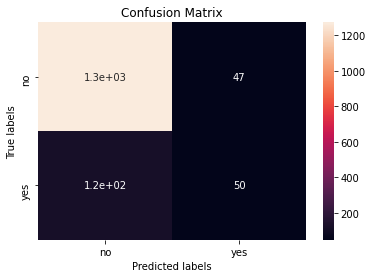

In [23]:
cm = confusion_matrix(y_test, random.predict(X_test))

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['no', 'yes']); ax.yaxis.set_ticklabels(['no', 'yes']);

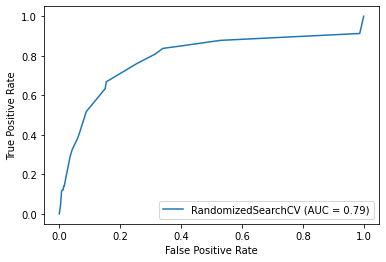

In [24]:
metrics.plot_roc_curve(random, X_test, y_test)
plt.show()

[0.08258421 0.00830744 0.         0.         0.06056386 0.
 0.0019881  0.04244205 0.38527368 0.00541674 0.19969897 0.0065777
 0.10306954 0.04302787 0.03821196 0.         0.         0.00930433
 0.01353357 0.        ]


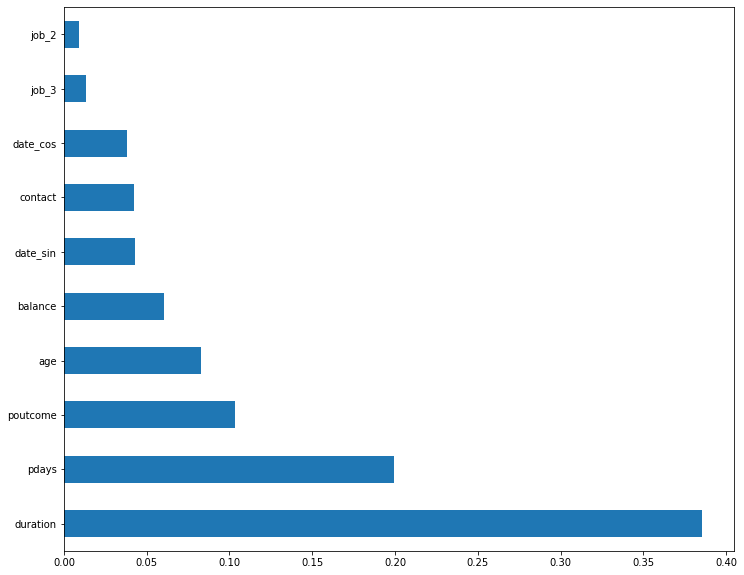

In [25]:
plt.figure(figsize=(12,10))
model = random.best_estimator_
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
max_depth=[3, 5, 6]
criterion=["gini","entropy"]
min_samples_split=[5,10,15]
param_grid = dict(max_depth=max_depth,criterion=criterion, min_samples_split=min_samples_split)

random = RandomizedSearchCV(estimator=tree_model, param_distributions=param_grid, cv = 3, n_jobs=-1, scoring='f1')

random_result = random.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

random.fit(X_train, y_train)

score = accuracy_score(y_test, random.predict(X_test))
f1 = f1_score(y_test, random.predict(X_test))
roc = roc_auc_score(y_test,random.predict(X_test))
recall = recall_score(y_test,random.predict(X_test))

print('Score:', score)
print('F1:', f1)
print('ROC:', roc)
print('Recall:', recall)

row_df = pd.DataFrame({'score':score, 'f1':f1, "roc":roc, "recall":recall}, index = ["RFC"])
scores = pd.concat([row_df, scores])

Best: 0.439461 using {'min_samples_split': 10, 'max_depth': 6, 'criterion': 'gini'}
Score: 0.8847184986595175
F1: 0.3722627737226277
ROC: 0.6289376321353066
Recall: 0.29651162790697677


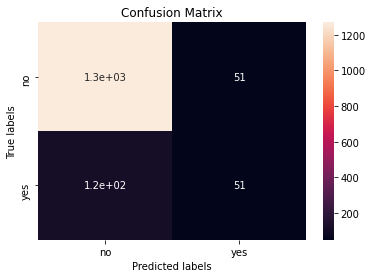

In [28]:
cm = confusion_matrix(y_test, random.predict(X_test))

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['no', 'yes']); ax.yaxis.set_ticklabels(['no', 'yes']);

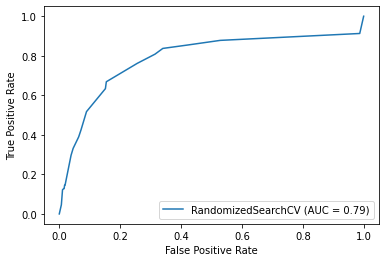

In [29]:
metrics.plot_roc_curve(random, X_test, y_test)
plt.show()

[0.08258421 0.00830744 0.         0.00620289 0.05558032 0.
 0.0019881  0.04244205 0.38527368 0.00774282 0.19969897 0.0065777
 0.10306954 0.03555768 0.05144104 0.         0.         0.
 0.01353357 0.        ]


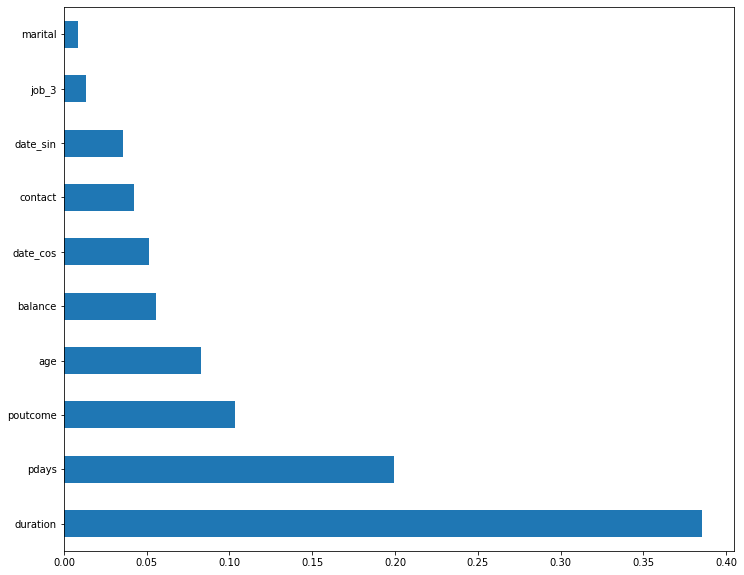

In [30]:
plt.figure(figsize=(12,10))
model = random.best_estimator_
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Regresja logistyczna

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
C = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l1', 'l2', 'none']
dual = [True, False]
tol = [1e-4, 1e-5, 1e-6, 1e-3, 1e-2]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

random_grid = {'C': C,
               'penalty': penalty,
               'dual': dual,
               'tol': tol,
               'solver': solver}




random = RandomizedSearchCV(estimator=lr, param_distributions=random_grid, cv = 3, n_jobs=-1, scoring='f1')

random_result = random.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

random.fit(X_train, y_train)

score = accuracy_score(y_test, random.predict(X_test))
f1 = f1_score(y_test, random.predict(X_test))
roc = roc_auc_score(y_test,random.predict(X_test))
recall = recall_score(y_test,random.predict(X_test))

print('Score:', score)
print('F1:', f1)
print('ROC:', roc)
print('Recall:', recall)

row_df = pd.DataFrame({'score':score, 'f1':f1, "roc":roc, "recall":recall}, index = ["LR"])
scores = pd.concat([row_df, scores])

Best: 0.324284 using {'tol': 0.001, 'solver': 'liblinear', 'penalty': 'l1', 'dual': False, 'C': 10}
Score: 0.8806970509383378
F1: 0.2936507936507936
ROC: 0.591270260747005
Recall: 0.21511627906976744


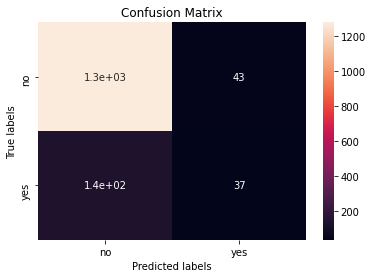

In [33]:
cm = confusion_matrix(y_test, random.predict(X_test))

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['no', 'yes']); ax.yaxis.set_ticklabels(['no', 'yes']);

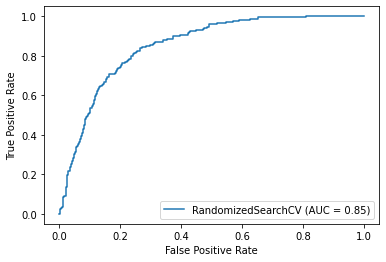

In [34]:
metrics.plot_roc_curve(random, X_test, y_test)
plt.show()

Feature: 0, Score: 0.00034
Feature: 1, Score: -0.04217
Feature: 2, Score: 0.02660
Feature: 3, Score: 0.27544
Feature: 4, Score: 0.00003
Feature: 5, Score: -0.63895
Feature: 6, Score: -0.80299
Feature: 7, Score: -0.49652
Feature: 8, Score: 0.00337
Feature: 9, Score: -0.08078
Feature: 10, Score: 0.00371
Feature: 11, Score: 0.18775
Feature: 12, Score: 0.34711
Feature: 13, Score: -0.63357
Feature: 14, Score: -1.94430
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.65581
Feature: 17, Score: -0.00570
Feature: 18, Score: 0.30695
Feature: 19, Score: 0.30561


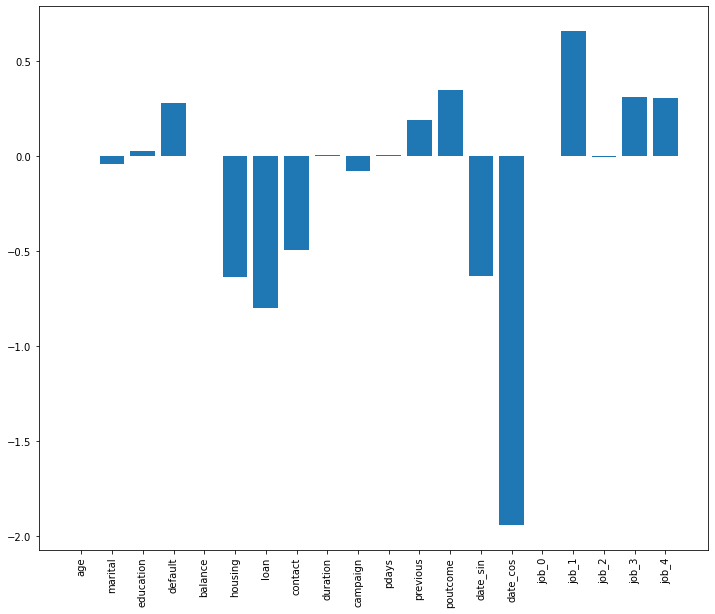

In [35]:
plt.figure(figsize=(12,10))

# logistic regression for feature importance
from sklearn.datasets import make_classification

model = random.best_estimator_
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance, tick_label = X.columns)
plt.xticks(rotation='vertical')
plt.show()


### Naiwny klasyfikator Bayesowski

In [51]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [52]:
var_smoothing = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-10, 1e-11, 1e-12, 1e-13]

random_grid = {'var_smoothing': var_smoothing}


random = RandomizedSearchCV(estimator=gnb, param_distributions=random_grid, cv = 3, n_jobs=-1, scoring='f1')

random_result = random.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

random.fit(X_train, y_train)

score = accuracy_score(y_test, random.predict(X_test))
f1 = f1_score(y_test, random.predict(X_test))
roc = roc_auc_score(y_test,random.predict(X_test))
recall = recall_score(y_test,random.predict(X_test))

print('Score:', score)
print('F1:', f1)
print('ROC:', roc)
print('Recall:', recall)

row_df = pd.DataFrame({'score':score, 'f1':f1, "roc":roc, "recall":recall}, index = ["GNB"])
scores = pd.concat([row_df, scores])

Best: 0.431779 using {'var_smoothing': 1e-06}
Score: 0.8592493297587132
F1: 0.41011235955056174
ROC: 0.6701638477801268
Recall: 0.42441860465116277


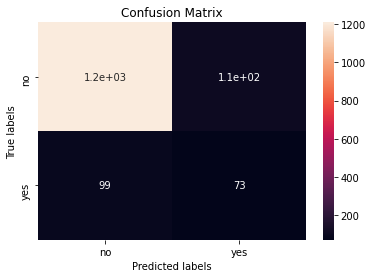

In [53]:
cm = confusion_matrix(y_test, random.predict(X_test))

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['no', 'yes']); ax.yaxis.set_ticklabels(['no', 'yes']);

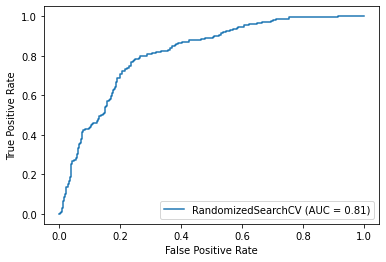

In [54]:
metrics.plot_roc_curve(random, X_test, y_test)
plt.show()

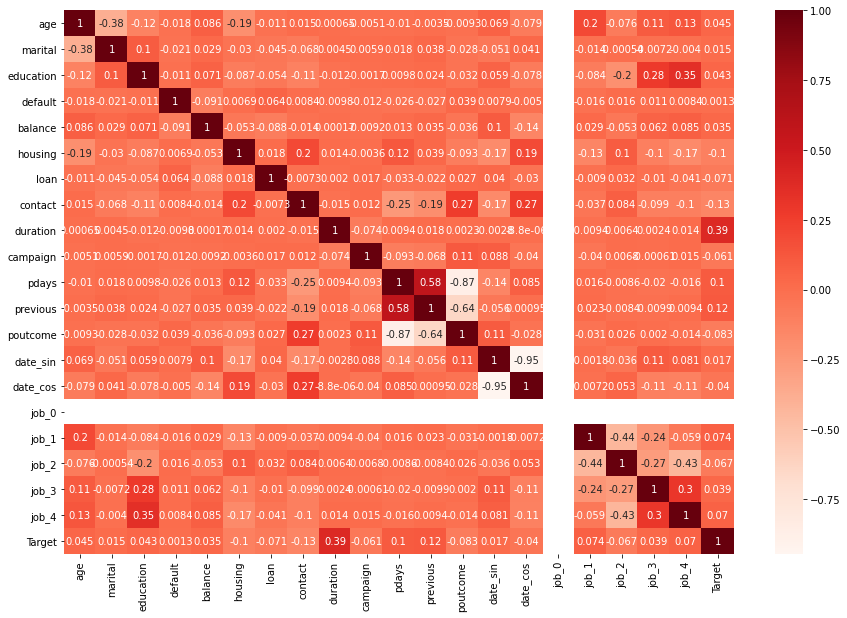

In [56]:
X_y = X.copy()
X_y['Target'] = y

plt.figure(figsize=(15,10))
cor = X_y.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


### XGB Classifier

In [41]:
from xgboost import XGBClassifier

model=XGBClassifier()

random_state = [1, 10, 100]
learning_rate = [0.01, 0.05, 0.1, 0.25, 0.001, 0.005]
booster = ['gbtree', 'gblinear']
nround = [100,200, 50, 10]
max_depth = [1,4,5,10]

random_grid = {'random_state': random_state,
              'learning_rate': learning_rate,
              'booster': booster,
              'nround': nround,
              'max_depth': max_depth}



random = RandomizedSearchCV(estimator=model, param_distributions=random_grid, cv = 3, n_jobs=-1, scoring='f1')

random_result = random.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

random.fit(X_train, y_train)

score = accuracy_score(y_test, random.predict(X_test))
f1 = f1_score(y_test, random.predict(X_test))
roc = roc_auc_score(y_test,random.predict(X_test))
recall = recall_score(y_test,random.predict(X_test))

print('Score:', score)
print('F1:', f1)
print('ROC:', roc)
print('Recall:', recall)

row_df = pd.DataFrame({'score':score, 'f1':f1, "roc":roc, "recall":recall}, index = ["XGBC"])
scores = pd.concat([row_df, scores])

Best: 0.416896 using {'random_state': 10, 'nround': 10, 'max_depth': 10, 'learning_rate': 0.005, 'booster': 'gbtree'}
Score: 0.8887399463806971
F1: 0.40714285714285714
ROC: 0.6463794926004228
Recall: 0.3313953488372093


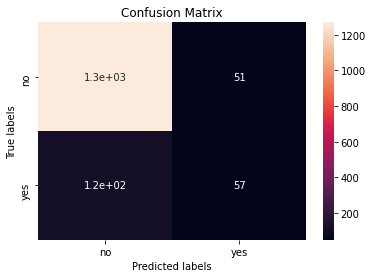

In [42]:
cm = confusion_matrix(y_test, random.predict(X_test))

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['no', 'yes']); ax.yaxis.set_ticklabels(['no', 'yes']);

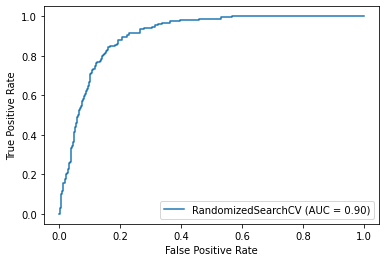

In [43]:
metrics.plot_roc_curve(random, X_test, y_test)
plt.show()

[0.04416317 0.03420692 0.03709838 0.05433132 0.03611972 0.03754946
 0.04107123 0.09329443 0.11433203 0.03351653 0.08734518 0.04791636
 0.15748744 0.05593821 0.         0.         0.03549795 0.03143152
 0.03069975 0.02800033]


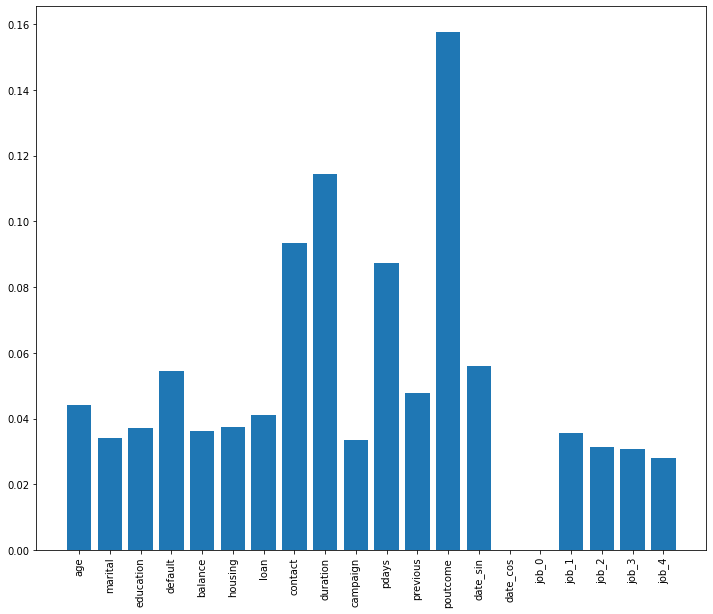

In [44]:
plt.figure(figsize=(12,10))

model = random.best_estimator_

print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_, tick_label = X.columns)
plt.xticks(rotation = '90')
plt.show()

### Podsumowanie

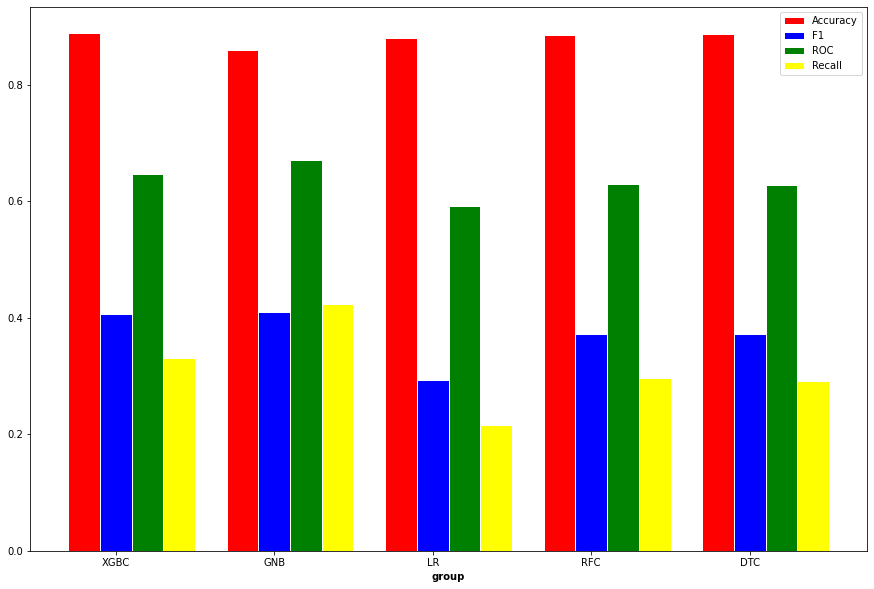

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

# set width of bar
barWidth = 0.2
 
# set height of bar
bars1 = scores['score']
bars2 = scores['f1']
bars3 = scores['roc']
bars4 = scores['recall']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='F1')
plt.bar(r3, bars3, color='green', width=barWidth, edgecolor='white', label='ROC')
plt.bar(r4, bars4, color='yellow', width=barWidth, edgecolor='white', label='Recall')

 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], scores.index)
 
# Create legend & Show graphic
plt.legend()
plt.show()


In [46]:
scores

,score,f1,roc,recall
XGBC,0.888740,0.407143,0.646379,0.331395
GNB,0.859249,0.410112,0.670164,0.424419
LR,0.880697,0.293651,0.591270,0.215116
RFC,0.884718,0.372263,0.628938,0.296512
DTC,0.886729,0.371747,0.627546,0.290698


Zdecydowaliśmy się wybrać GNB, ponieważ ma jedne z najlepszych wyników, szczególnie warto zwrócić uwagę na Recall - lepiej zadzwonić do klienta, który odrzuci ofertę, niż nie zadzwonić do osoby, która ofertę by przyjęła.